In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
description = pd.read_excel("C:/Users/rishitha/Desktop/datadictionary.xlsx")
description

,Attribute,Description
0,Name,Car Name
1,Location,Car Location
2,Year,Car Manufacturing year
3,Kilometers_Driven,Kilometers Driven
4,Fuel_Type,Type of fuel
5,Transmission,Type of transmission
6,Owner_Type,Owner's type
7,Mileage,Car's mileage
8,Engine,Engine Capacity
9,Power,Engine power


In [5]:
df = pd.read_csv("C:/Users/rishitha/Desktop/Cars.csv")

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [7]:
df.shape

(5961, 15)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5960, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5960 non-null   object 
 1   Location           5949 non-null   object 
 2   Year               5958 non-null   float64
 3   Kilometers_Driven  5952 non-null   float64
 4   Fuel_Type          5960 non-null   object 
 5   Transmission       5933 non-null   object 
 6   Owner_Type         5945 non-null   object 
 7   Mileage            5958 non-null   object 
 8   Engine             5943 non-null   object 
 9   Power              5928 non-null   object 
 10  Colour             5949 non-null   object 
 11  Seats              5955 non-null   float64
 12  No. of Doors       5959 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5960 non-null   float64
dtypes: float64(5), object(10)
memory usage: 745.0+ KB


In [11]:
df_cat = ['Name','Location','Fuel_Type','Transmission','Owner_Type','Colour']

In [12]:
for col in df_cat:
    print(col.upper(),":",df[col].nunique())
    print(df[col].value_counts().sort_values(ascending=False))
    print('\n')

NAME : 212
Maruti Swift           343
Honda City             265
Hyundai i20            247
Hyundai Verna          170
Toyota Innova          164
                      ... 
Fiat Petra               1
Volkswagen Tiguan        1
Mitsubishi Montero       1
Bentley Continental      1
Mahindra E               1
Name: Name, Length: 212, dtype: int64


LOCATION : 11
Mumbai        781
Hyderabad     738
Kochi         646
Coimbatore    630
Pune          611
Delhi         549
Kolkata       526
Chennai       489
Jaipur        406
Bangalore     351
Ahmedabad     222
Name: Location, dtype: int64


FUEL_TYPE : 5
Diesel      3188
Petrol      2704
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


TRANSMISSION : 2
Manual       4224
Automatic    1709
Name: Transmission, dtype: int64


OWNER_TYPE : 4
First             4874
Second             953
Third              110
Fourth & Above       8
Name: Owner_Type, dtype: int64


COLOUR : 3
White           2115
Others          19

In [13]:
df.drop('Name',axis=1,inplace=True)

In [14]:
df['Mileage'] = df['Mileage'].str.replace('[a-zA-Z/]', '',regex=True)
df['Mileage'] = df['Mileage'].astype('float')

In [15]:
df['Engine'] = df['Engine'].str.replace('[a-zA-Z/]', '',regex=True)
df['Engine'] = df['Engine'].astype('float')

In [16]:
df['Power'] = df['Power'].str.replace('[a-zA-Z/ ]', '',regex=True)
df['Power'].replace('',np.nan,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5949 non-null   object 
 1   Year               5958 non-null   float64
 2   Kilometers_Driven  5952 non-null   float64
 3   Fuel_Type          5960 non-null   object 
 4   Transmission       5933 non-null   object 
 5   Owner_Type         5945 non-null   object 
 6   Mileage            5958 non-null   float64
 7   Engine             5943 non-null   float64
 8   Power              5825 non-null   object 
 9   Colour             5949 non-null   object 
 10  Seats              5955 non-null   float64
 11  No. of Doors       5959 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              5960 non-null   float64
dtypes: float64(7), object(7)
memory usage: 698.4+ KB


In [18]:
df['New_Price'].isnull().sum()

5136

In [19]:
for i in df.columns:
    print('Precentage of missing values is {} % in {} '.format(round(
        (df[i].isnull().sum()/df.shape[0])*100,2),i))

Precentage of missing values is 0.18 % in Location 
Precentage of missing values is 0.03 % in Year 
Precentage of missing values is 0.13 % in Kilometers_Driven 
Precentage of missing values is 0.0 % in Fuel_Type 
Precentage of missing values is 0.45 % in Transmission 
Precentage of missing values is 0.25 % in Owner_Type 
Precentage of missing values is 0.03 % in Mileage 
Precentage of missing values is 0.29 % in Engine 
Precentage of missing values is 2.27 % in Power 
Precentage of missing values is 0.18 % in Colour 
Precentage of missing values is 0.08 % in Seats 
Precentage of missing values is 0.02 % in No. of Doors 
Precentage of missing values is 86.17 % in New_Price 
Precentage of missing values is 0.0 % in Price 


In [20]:
df.drop('New_Price',axis=1,inplace=True)

In [21]:
for col in df.select_dtypes(exclude='object'):
    df[col] = df[col].replace(np.nan,df[col].median())

In [22]:
df.isnull().sum()

Location              11
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission          27
Owner_Type            15
Mileage                0
Engine                 0
Power                135
Colour                11
Seats                  0
No. of Doors           0
Price                  0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(5789, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5789 entries, 0 to 5960
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5789 non-null   object 
 1   Year               5789 non-null   float64
 2   Kilometers_Driven  5789 non-null   float64
 3   Fuel_Type          5789 non-null   object 
 4   Transmission       5789 non-null   object 
 5   Owner_Type         5789 non-null   object 
 6   Mileage            5789 non-null   float64
 7   Engine             5789 non-null   float64
 8   Power              5789 non-null   object 
 9   Colour             5789 non-null   object 
 10  Seats              5789 non-null   float64
 11  No. of Doors       5789 non-null   float64
 12  Price              5789 non-null   float64
dtypes: float64(7), object(6)
memory usage: 633.2+ KB


In [26]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
dtype: int64

In [27]:
df.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120,Black/Silver,8.0,5.0,6.00
1,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100,Others,5.0,4.0,8.32
2,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112,White,7.0,5.0,4.00
3,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70,White,5.0,4.0,3.49
4,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102,Others,8.0,5.0,6.40
5,Kochi,2018.0,15135.0,Petrol,Manual,First,17.50,1199.0,88.7,White,5.0,4.0,9.29
6,Bangalore,2016.0,79000.0,Diesel,Manual,First,24.80,1396.0,88.7,White,5.0,4.0,7.25
7,Pune,2015.0,36000.0,Diesel,Automatic,First,12.55,2982.0,168.5,White,7.0,5.0,22.00
8,Hyderabad,2009.0,156056.0,Diesel,Manual,First,12.80,2494.0,102,Others,8.0,5.0,8.50
9,Hyderabad,2012.0,61250.0,Diesel,Manual,First,25.44,936.0,57.6,Others,5.0,4.0,2.70


In [28]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,5789,11,Mumbai,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5789.0,NaN,NaN,NaN,2013.490413,3.161969,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5789.0,NaN,NaN,NaN,58324.699257,92748.008191,171.0,33249.0,52513.0,72465.0,6500000.0
Fuel_Type,5789,5,Diesel,3104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5789,2,Manual,4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5789,4,First,4773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5789.0,NaN,NaN,NaN,18.279337,4.360308,0.0,15.26,18.23,21.1,33.54
Engine,5789.0,NaN,NaN,NaN,1626.450164,601.919291,72.0,1198.0,1496.0,1991.0,5998.0
Power,5789,368,74,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colour,5789,3,White,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df[df['Mileage']==0]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
19,Hyderabad,2012.0,139000.0,Diesel,Automatic,First,0.0,2179.0,115,Black/Silver,5.0,4.0,16.75
36,Mumbai,2018.0,8682.0,Diesel,Automatic,First,0.0,1950.0,194,White,5.0,4.0,39.50
920,Kolkata,2012.0,24720.0,Diesel,Automatic,Second,0.0,2967.0,241.4,Others,5.0,4.0,28.00
955,Bangalore,2014.0,33000.0,Diesel,Automatic,Second,0.0,2987.0,165,Black/Silver,5.0,4.0,43.00
1110,Hyderabad,2010.0,54000.0,Petrol,Automatic,First,0.0,3597.0,262.6,Black/Silver,5.0,4.0,6.00
1211,Kochi,2011.0,20842.0,Petrol,Manual,First,0.0,1086.0,62,Others,5.0,4.0,2.78
1687,Ahmedabad,2012.0,66000.0,Diesel,Automatic,First,0.0,2987.0,165,White,5.0,4.0,23.00
1751,Kolkata,2009.0,60170.0,Petrol,Manual,First,0.0,1086.0,62,White,5.0,4.0,1.15
2298,Pune,2008.0,93000.0,Petrol,Manual,First,0.0,1086.0,62,White,5.0,4.0,1.45
2549,Chennai,2012.0,63000.0,Diesel,Automatic,First,0.0,2987.0,165,White,5.0,4.0,26.00


In [30]:
df.Mileage.replace(0,df.Mileage.median(),inplace=True)

In [31]:
df[df['Mileage']==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price


In [32]:
df[df['Engine']==72]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
5242,Chennai,2016.0,50000.0,Electric,Automatic,First,18.16,72.0,41,White,5.0,4.0,13.0


In [33]:
df = df.drop(df[df['Engine'] == 72].index)

In [34]:
df[df['Engine']==72]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price


In [35]:
df.shape

(5788, 13)

In [36]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour', 'Seats',
       'No. of Doors', 'Price'],
      dtype='object')

In [37]:
df_cat = ['Location','Fuel_Type','Transmission','Owner_Type','Colour']

In [38]:
df_num = ['Year','Kilometers_Driven','Mileage', 'Engine', 'Power','Seats','No. of Doors', 'Price']#Numerical Columns

<Axes: >

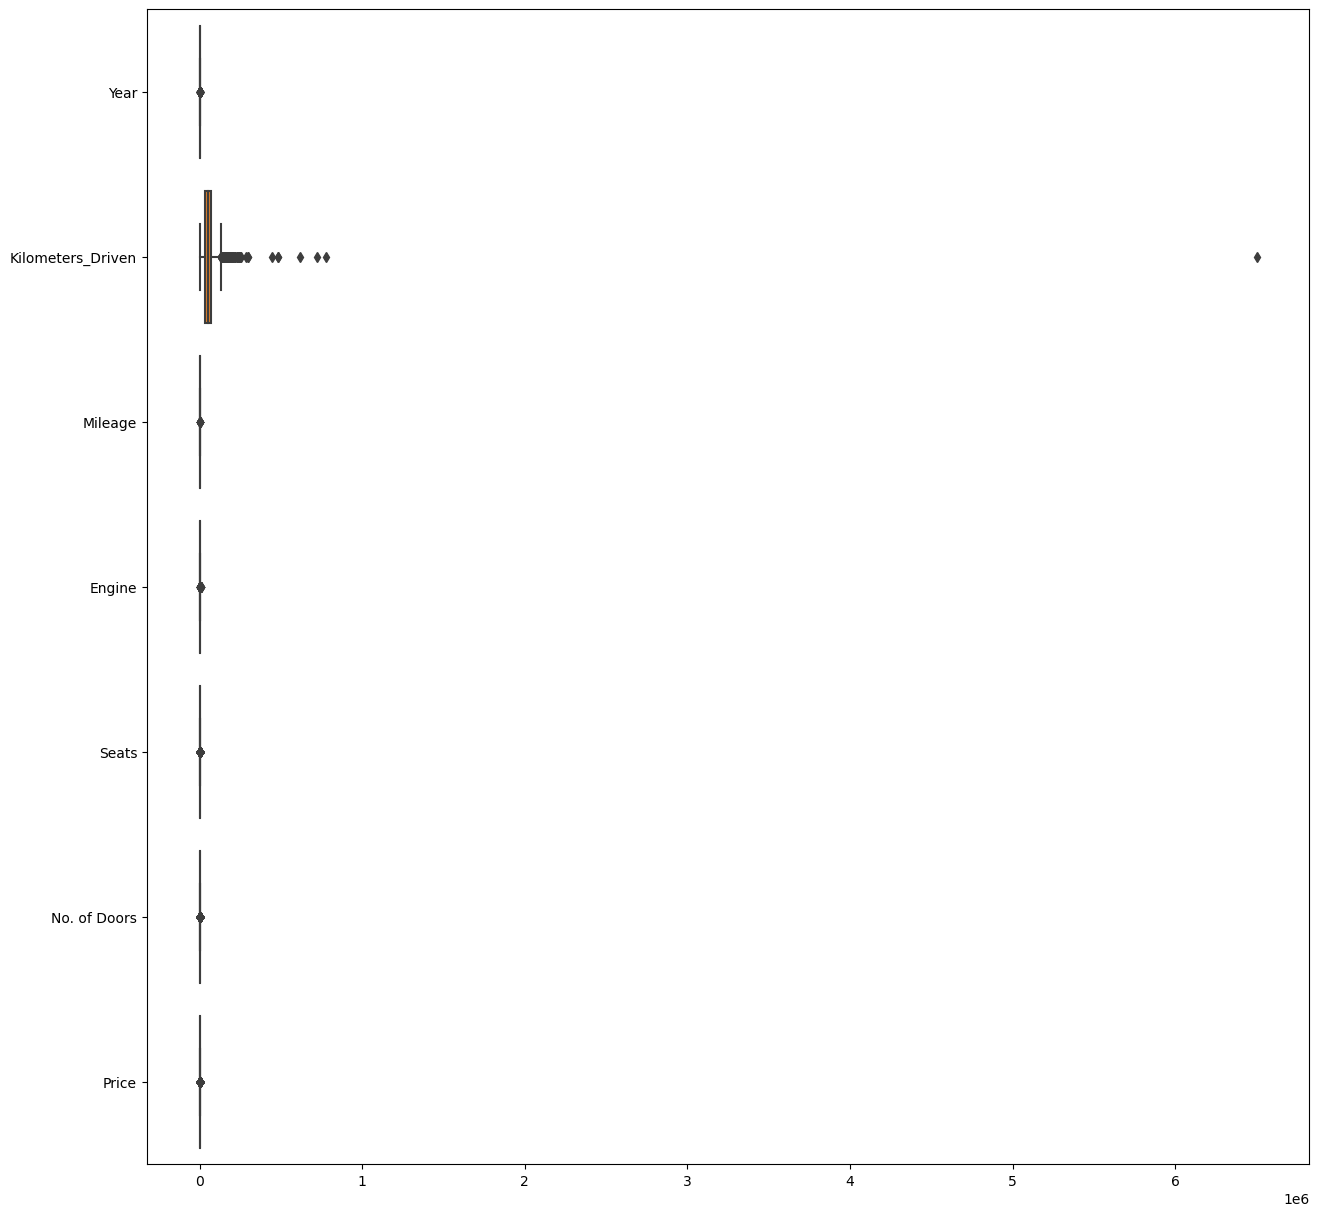

In [39]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient='h')

In [40]:
def outliers_per(col):
    Q1 = np.quantile(df[col],.25)
    Q3 = np.quantile(df[col],.75)
    IQR = Q3-Q1
    LL = Q1-(1.5*IQR)
    UL = Q3+(1.5*IQR)
    upper_count = df[df[col] > UL][col].count()
    upper_percentage = (upper_count/df.shape[0])*100
    lower_count = df[df[col] < LL][col].count()
    lower_percentage = (lower_count/df.shape[0])*100
    print('Outlier percentage of {col} upper range is {upper}% and lower range is {lower}%\n'.format(col=col,upper=round(upper_percentage,2),lower=round(lower_percentage,2)))
    return LL,UL

In [41]:
for i in df.select_dtypes(exclude='object').columns:
    outliers_per(i)

Outlier percentage of Year upper range is 0.0% and lower range is 1.74%

Outlier percentage of Kilometers_Driven upper range is 3.33% and lower range is 0.0%

Outlier percentage of Mileage upper range is 0.24% and lower range is 0.02%

Outlier percentage of Engine upper range is 0.98% and lower range is 0.0%

Outlier percentage of Seats upper range is 14.08% and lower range is 1.92%

Outlier percentage of No. of Doors upper range is 12.25% and lower range is 0.22%

Outlier percentage of Price upper range is 11.97% and lower range is 0.0%



In [42]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL 

In [43]:
for i in df.select_dtypes(exclude='object'):
    LL, UL = replace_outlier(df[i])
    df[i] = np.where(df[i]> UL, UL, df[i])
    df[i] = np.where(df[i]< LL, LL, df[i])#Winsorization 

<Axes: >

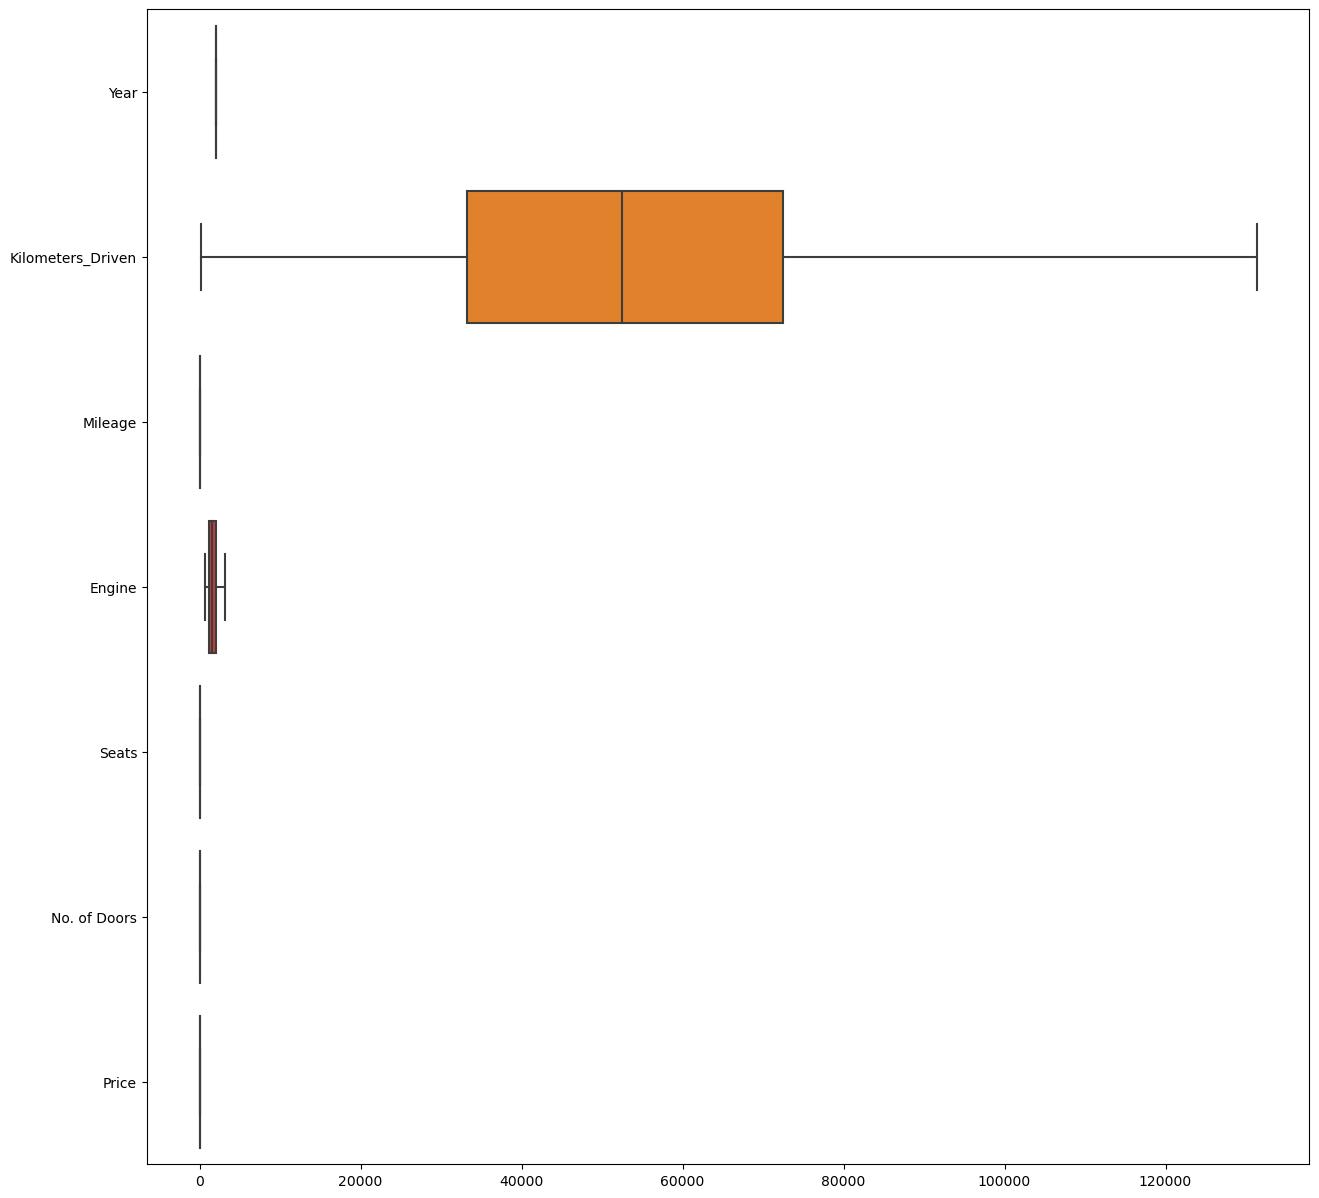

In [44]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient='h')

In [45]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,5788,11,Mumbai,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5788.0,NaN,NaN,NaN,2013.533345,3.030191,2006.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5788.0,NaN,NaN,NaN,55689.018163,30022.847678,171.0,33241.25,52514.5,72466.0,131303.125
Fuel_Type,5788,5,Diesel,3104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5788,2,Manual,4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5788,4,First,4772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5788.0,NaN,NaN,NaN,18.357034,4.153855,6.6,15.3,18.24,21.1,29.8
Engine,5788.0,NaN,NaN,NaN,1618.891068,570.785613,624.0,1198.0,1496.0,1991.0,3180.5
Power,5788,367,74,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colour,5788,3,White,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN


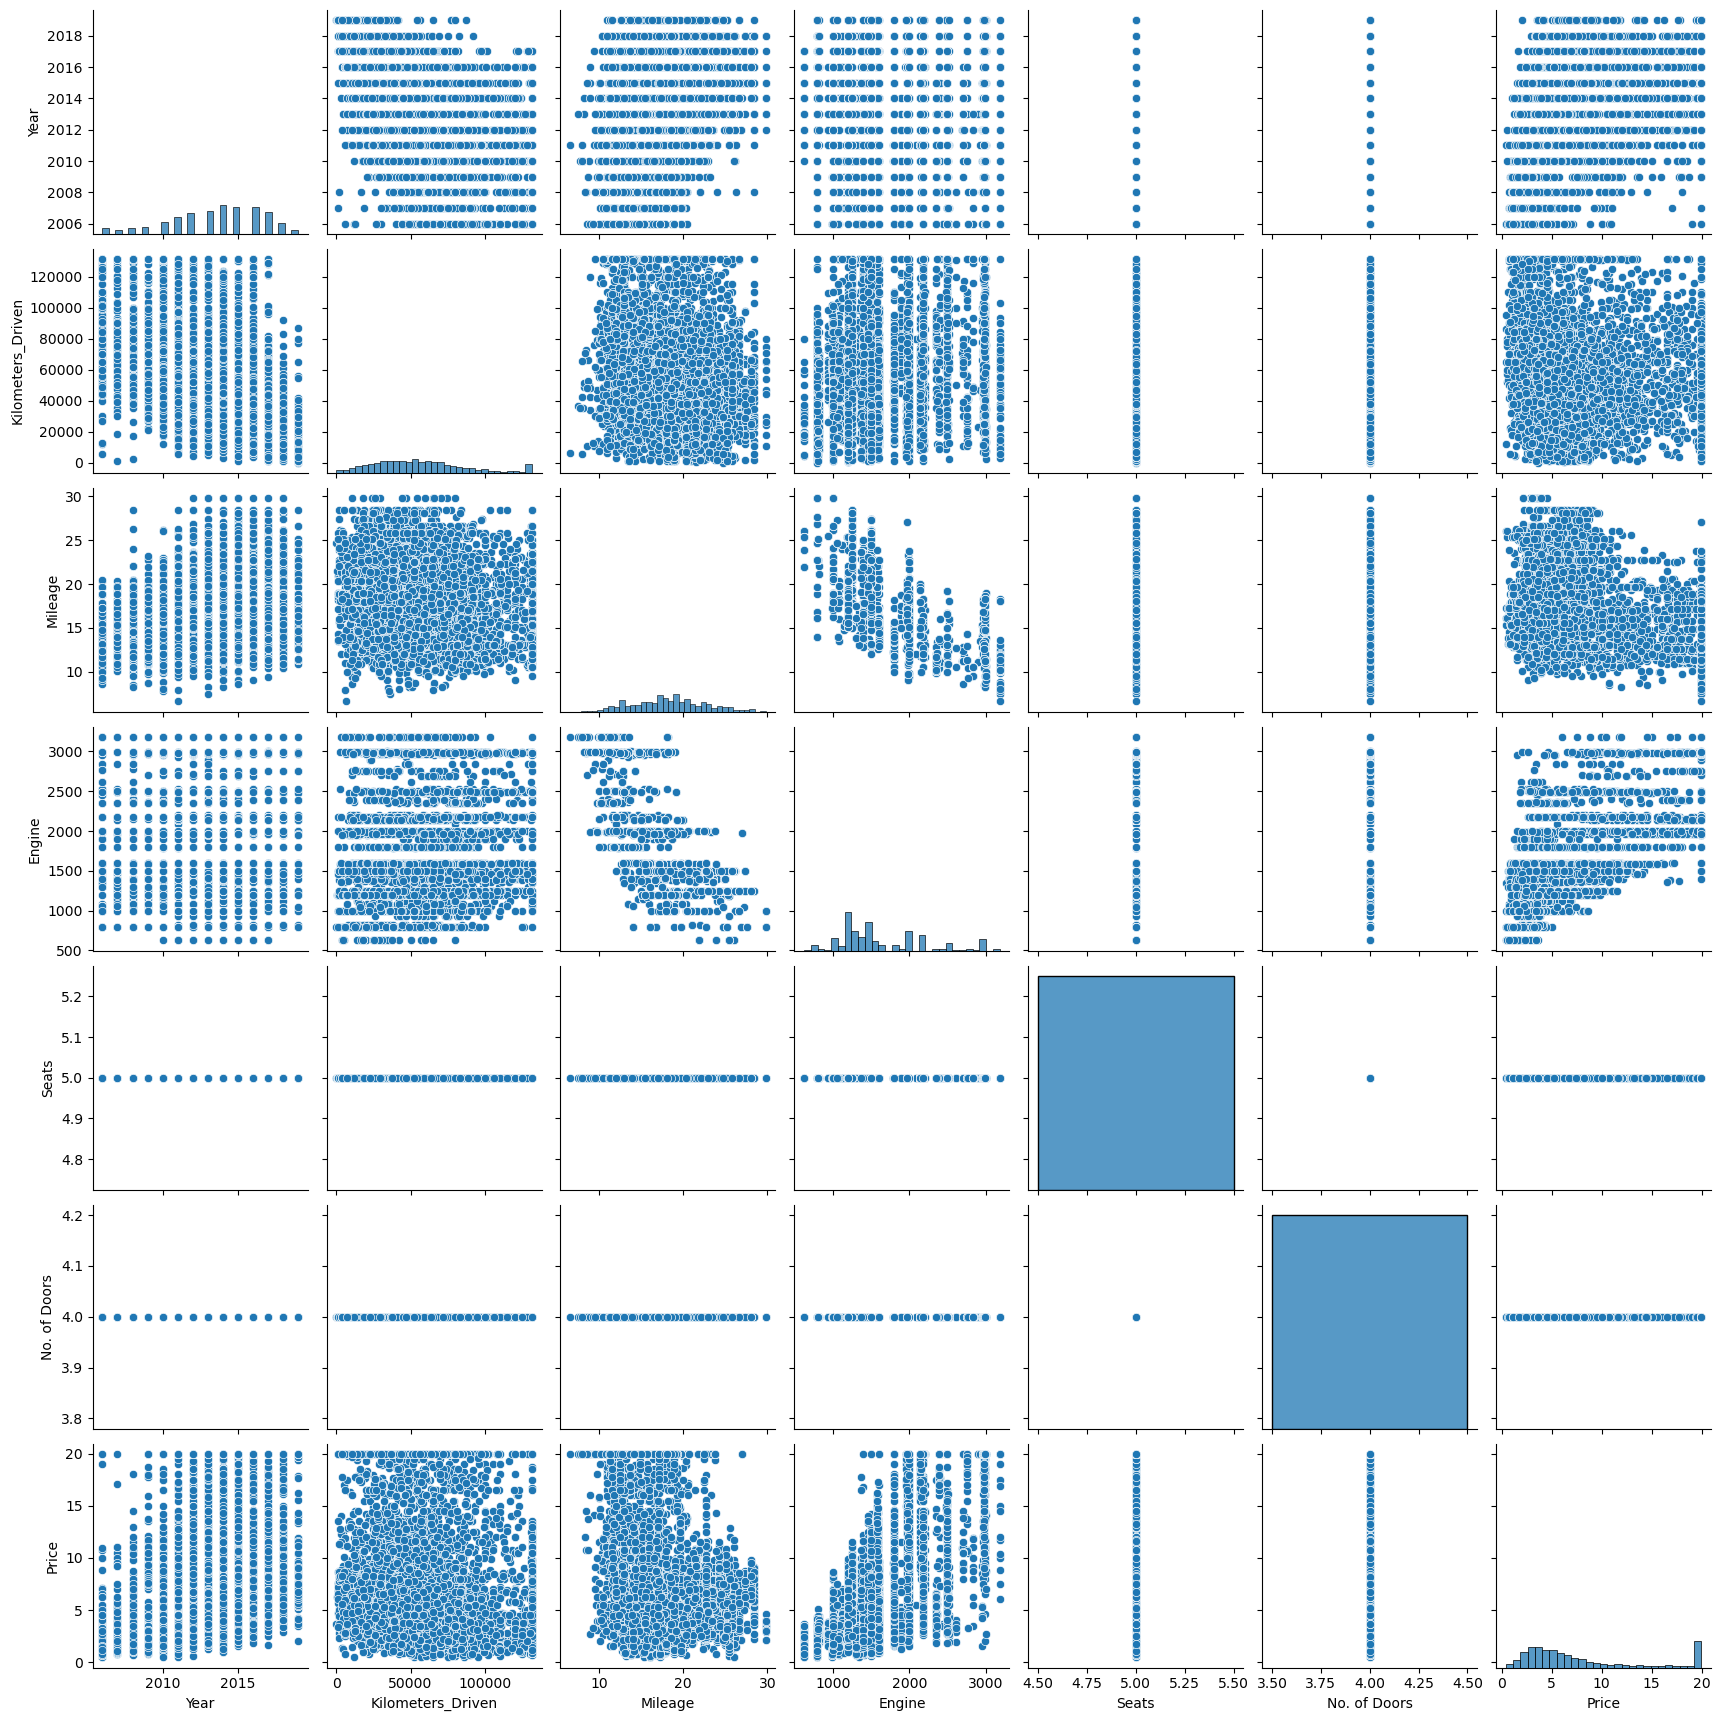

In [65]:
sns.pairplot(data=df)

C:\Users\rishitha\AppData\Local\Temp\ipykernel_12168\3944921408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=False)


<Axes: >

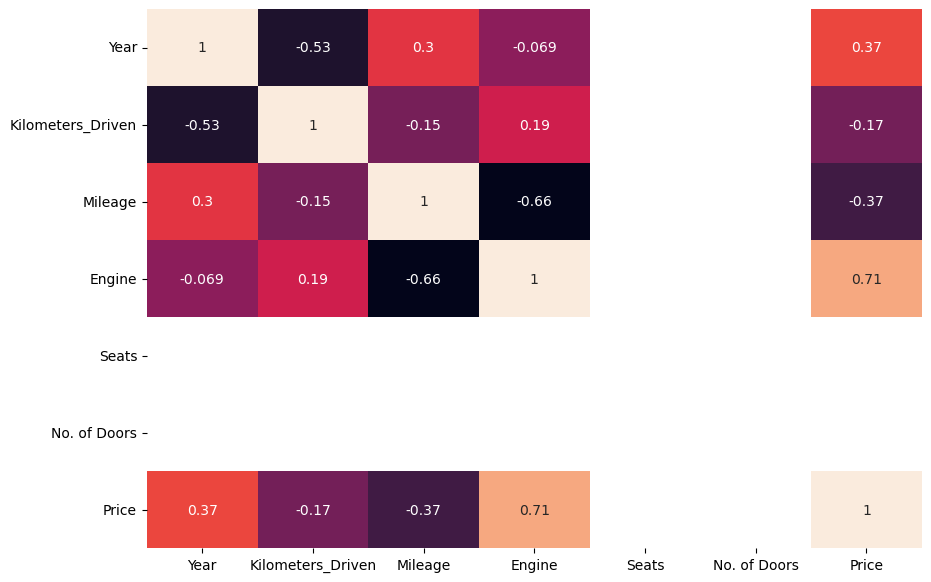

In [61]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True,cbar=False)

In [57]:
def uni_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=columns,kde=True,bins=20)
    plt.title('Histogram of {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()

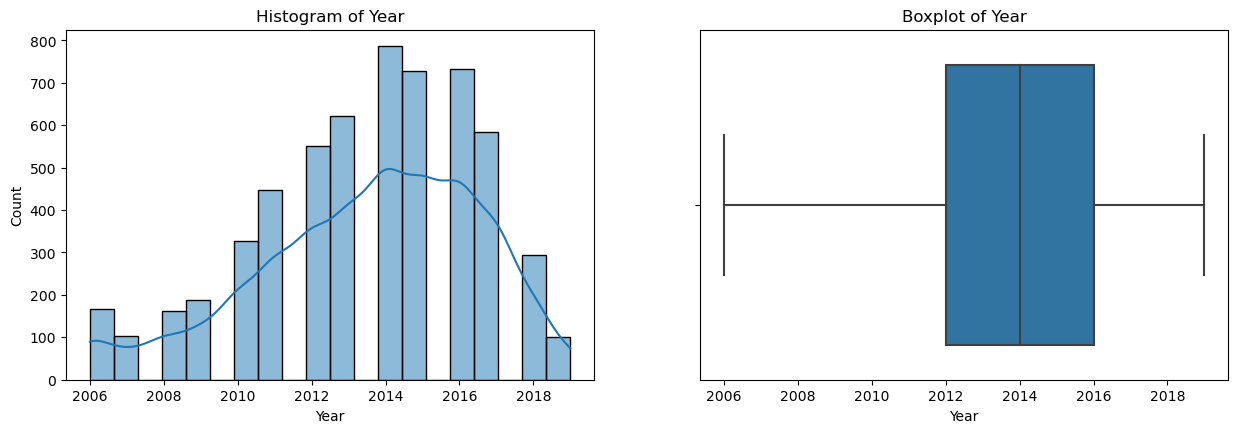

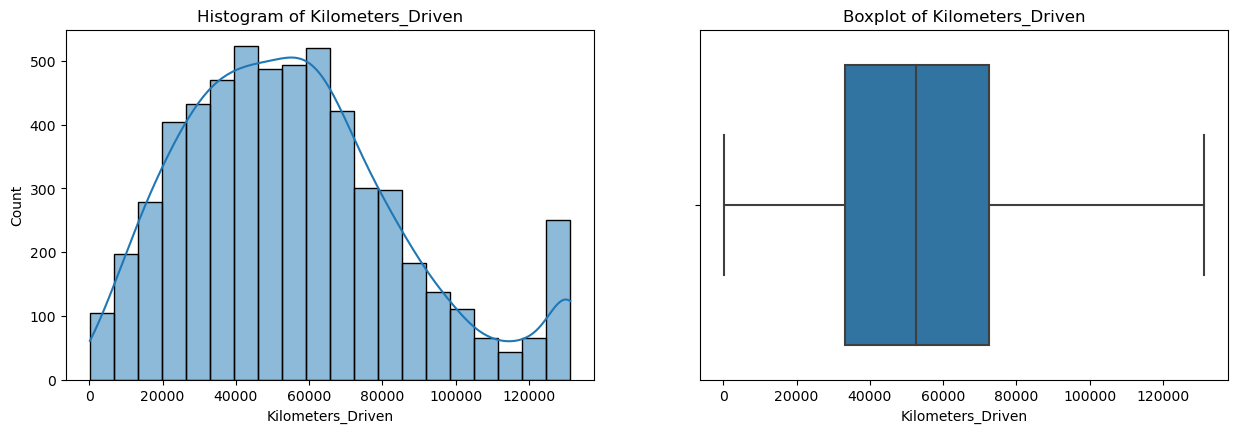

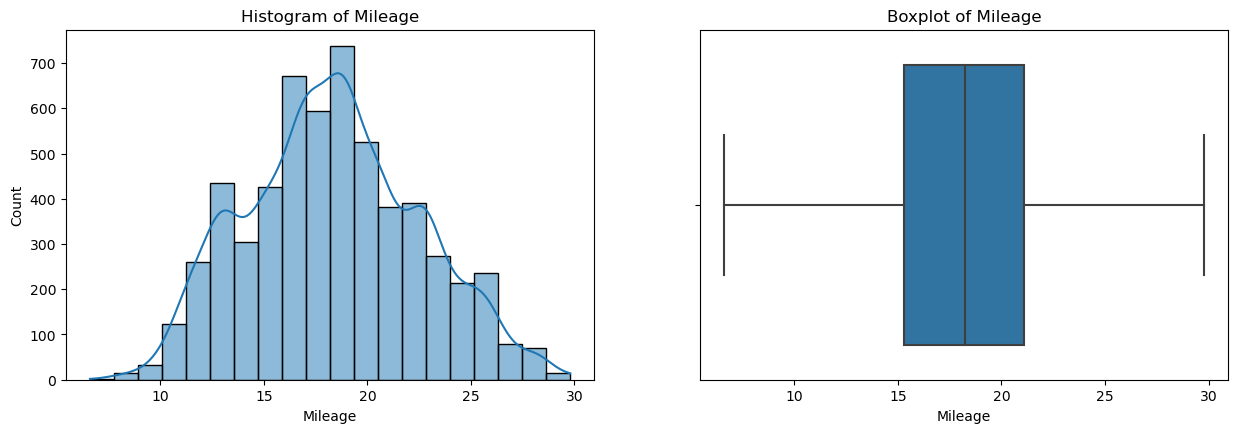

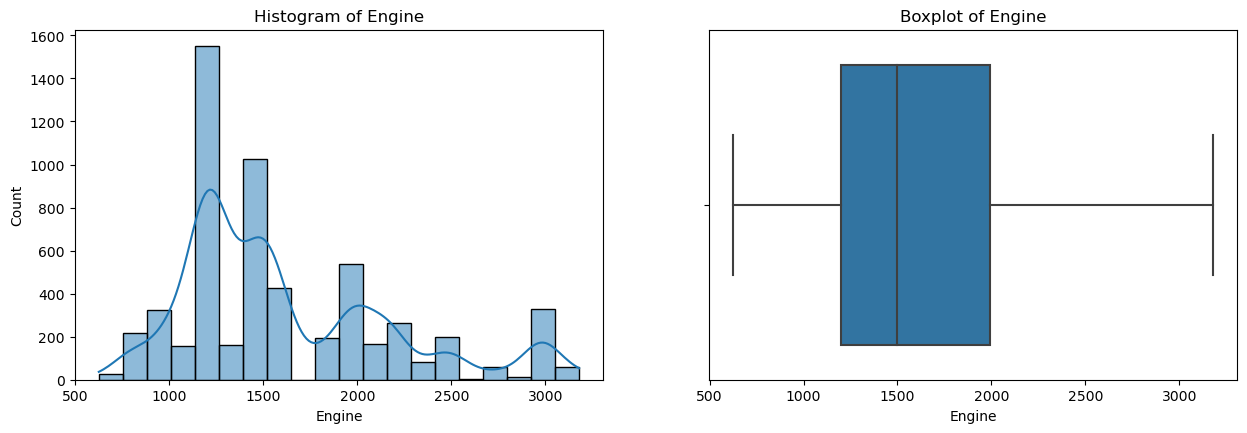

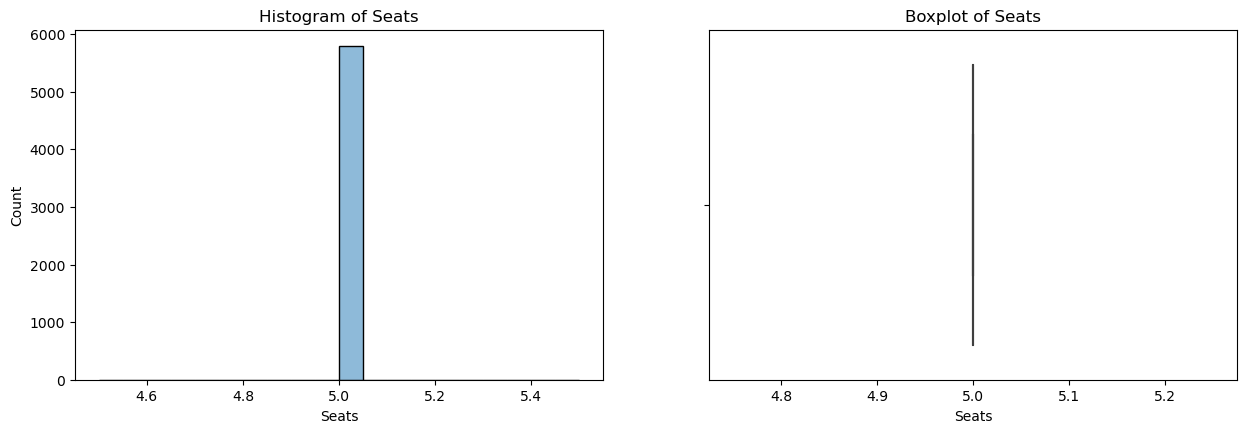

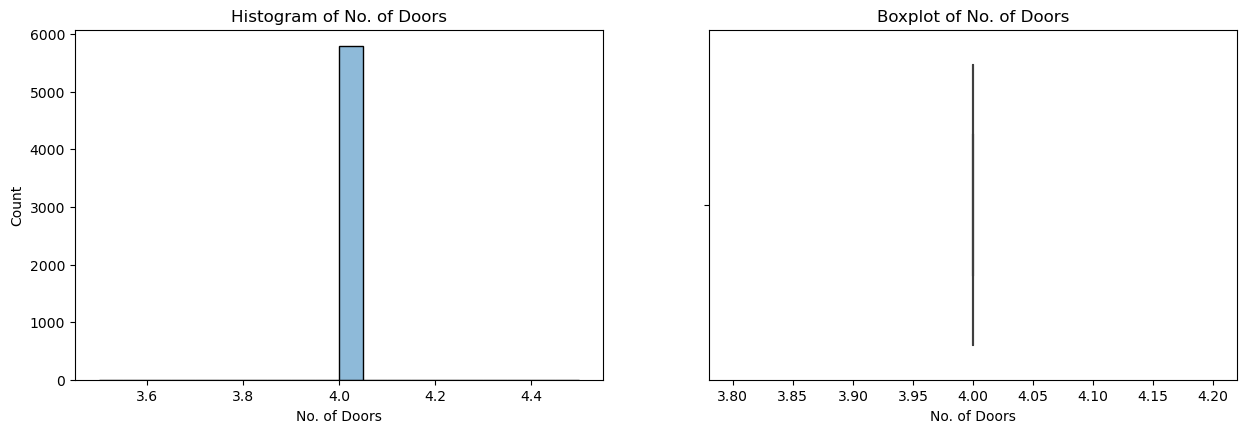

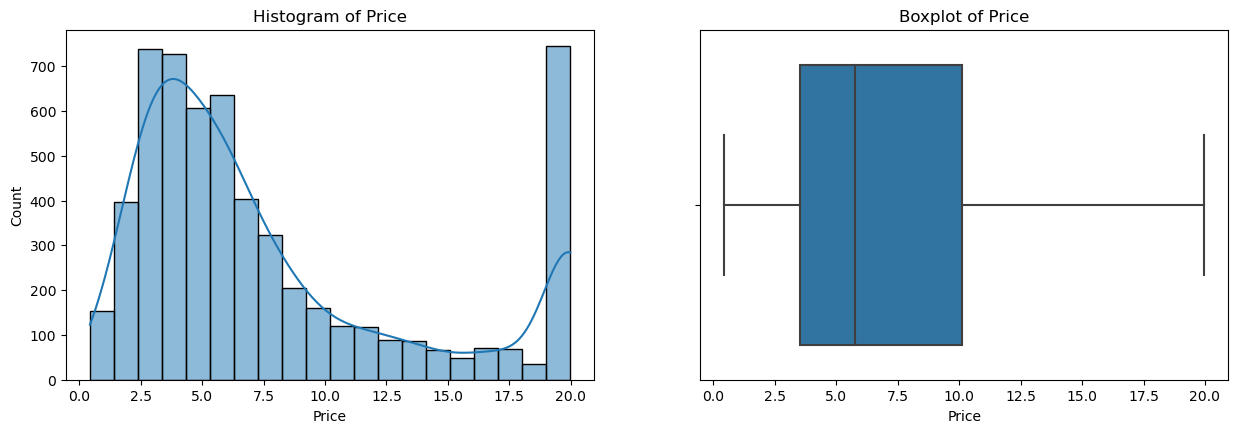

In [58]:
for i in df .select_dtypes(exclude='object'):
    uni_plot(i)

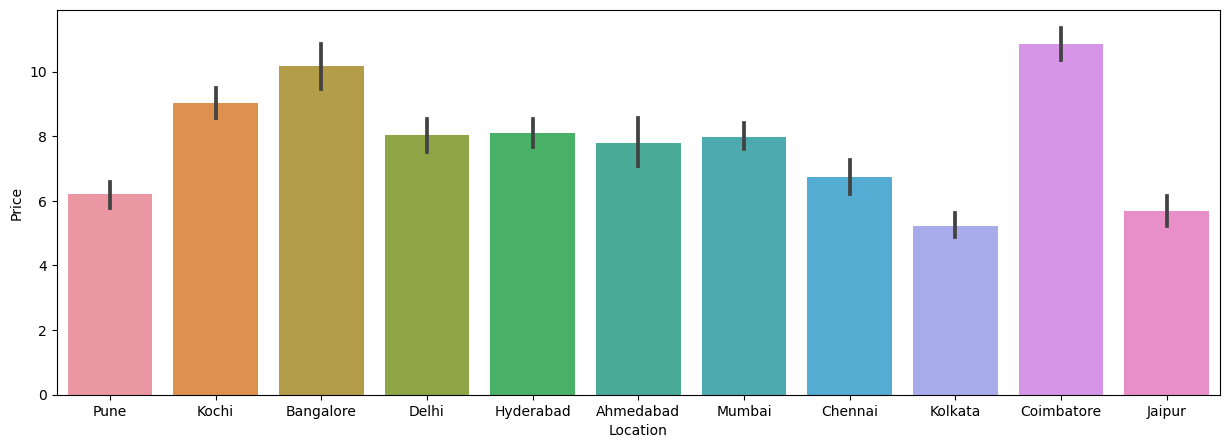

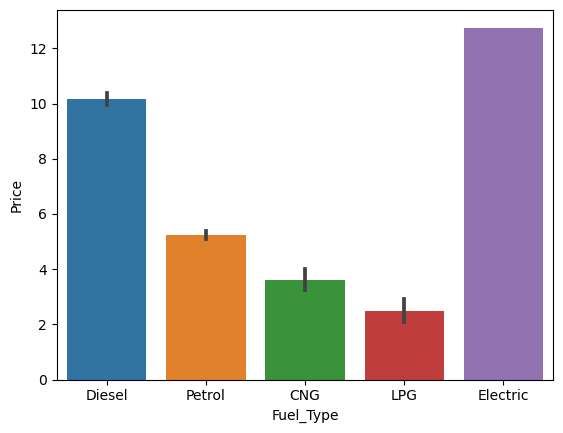

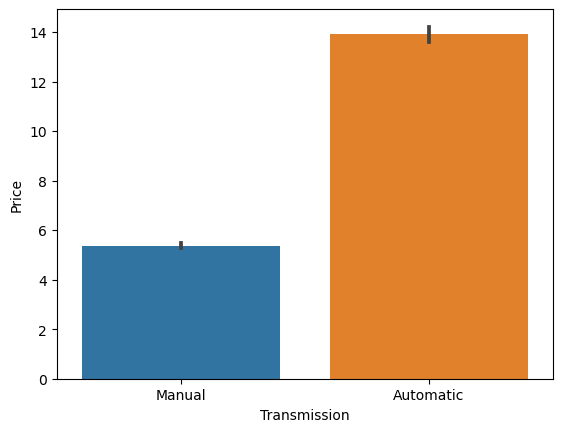

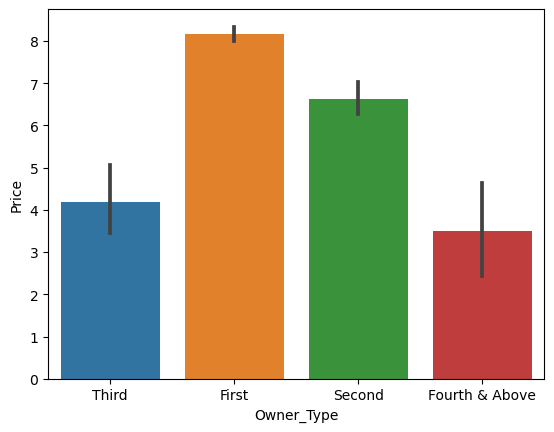

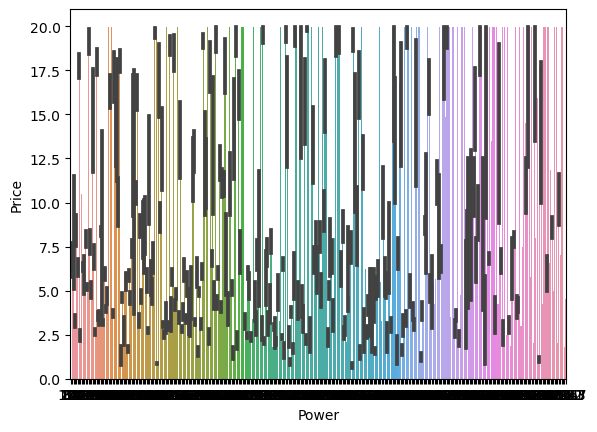

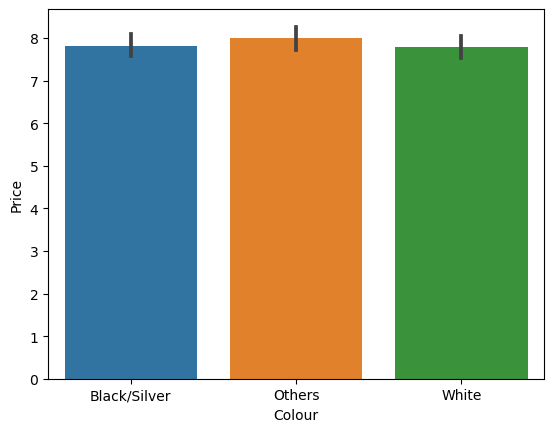

In [59]:
plt.figure(figsize=(15,5))
for col in df.select_dtypes(include='object'):
    sns.barplot(data=df,x=col,y="Price")
    plt.show()

<Axes: xlabel='Year', ylabel='Price'>

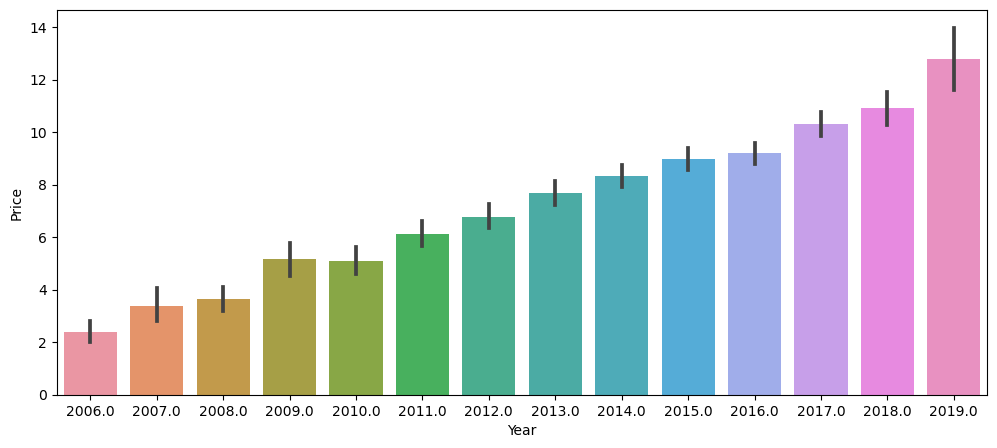

In [67]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Year'], y=df['Price'])

In [68]:
df.groupby('Location').median().T

C:\Users\rishitha\AppData\Local\Temp\ipykernel_12168\9036006.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Location').median().T


Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
Year,2014.0,2013.0,2012.00,2016.00,2014.00,2013.00,2013.000,2016.00,2013.00,2014.0,2013.00
Kilometers_Driven,55100.0,55000.0,68000.00,44260.00,60000.00,68434.00,66000.000,42768.50,39000.00,41000.0,66000.00
Mileage,18.9,17.0,18.16,18.16,17.60,19.00,19.300,18.60,19.10,17.5,17.92
Engine,1493.0,1598.0,1493.00,1498.00,1498.00,1493.00,1248.000,1493.00,1364.00,1497.0,1396.00
Seats,5.0,5.0,5.00,5.00,5.00,5.00,5.000,5.00,5.00,5.0,5.00
No. of Doors,4.0,4.0,4.00,4.00,4.00,4.00,4.000,4.00,4.00,4.0,4.00
Price,6.0,7.0,4.75,8.36,5.64,5.99,4.315,6.74,3.75,5.8,4.45


<Axes: xlabel='Location', ylabel='Price'>

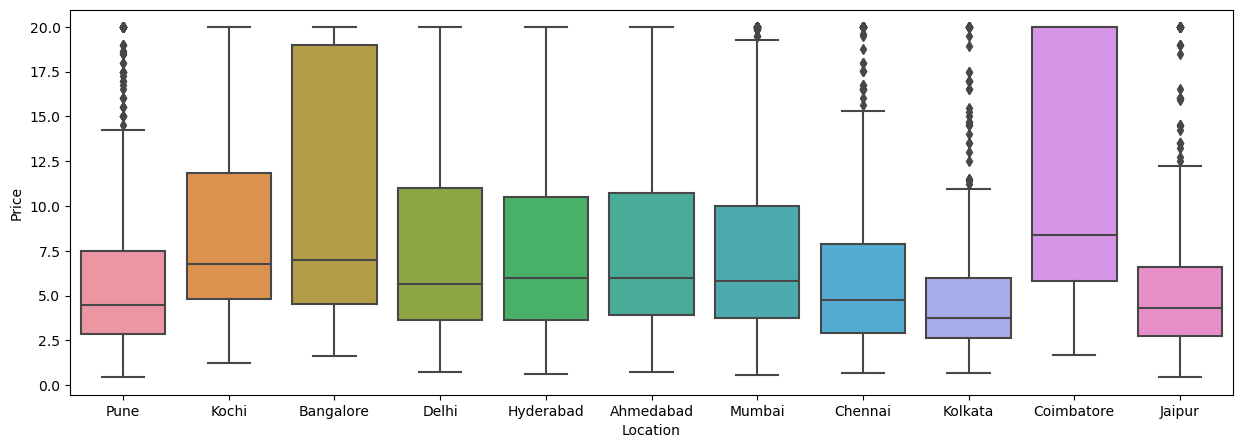

In [69]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,y='Price',x='Location')

In [70]:
df.groupby('Owner_Type').median().T

C:\Users\rishitha\AppData\Local\Temp\ipykernel_12168\4099425150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Owner_Type').median().T


Owner_Type,First,Fourth & Above,Second,Third
Year,2014.00,2008.000,2012.0,2009.00
Kilometers_Driven,50000.00,78500.000,66000.0,85000.00
Mileage,18.60,13.300,17.0,16.07
Engine,1493.00,1647.000,1498.0,1590.00
Seats,5.00,5.000,5.0,5.00
No. of Doors,4.00,4.000,4.0,4.00
Price,5.99,3.125,4.5,2.95


In [71]:
df.groupby('Transmission').median().T

C:\Users\rishitha\AppData\Local\Temp\ipykernel_12168\1835328027.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Transmission').median().T


Transmission,Automatic,Manual
Year,2014.00,2014.00
Kilometers_Driven,47000.00,55000.00
Mileage,16.07,19.01
Engine,1995.00,1248.00
Seats,5.00,5.00
No. of Doors,4.00,4.00
Price,16.00,4.65


In [72]:
for col in df.select_dtypes(include='object'):
    df[col] = pd.Categorical(df[col]).codes

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5788 entries, 0 to 5960
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5788 non-null   int8   
 1   Year               5788 non-null   float64
 2   Kilometers_Driven  5788 non-null   float64
 3   Fuel_Type          5788 non-null   int8   
 4   Transmission       5788 non-null   int8   
 5   Owner_Type         5788 non-null   int8   
 6   Mileage            5788 non-null   float64
 7   Engine             5788 non-null   float64
 8   Power              5788 non-null   int16  
 9   Colour             5788 non-null   int8   
 10  Seats              5788 non-null   float64
 11  No. of Doors       5788 non-null   float64
 12  Price              5788 non-null   float64
dtypes: float64(7), int16(1), int8(5)
memory usage: 401.3 KB


In [74]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,10,2012.0,99000.000,1,1,3,12.05,2179.0,45,0,5.0,4.0,6.00
1,7,2018.0,18678.000,4,1,0,21.10,998.0,0,1,5.0,4.0,8.32
2,1,2013.0,131303.125,1,1,0,11.68,2498.0,30,2,5.0,4.0,4.00
3,4,2014.0,45000.000,1,1,0,24.00,1120.0,286,2,5.0,4.0,3.49
4,4,2011.0,65000.000,1,1,0,12.80,2494.0,3,1,5.0,4.0,6.40


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop('Price',axis=1)
y = df['Price']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors
2285,7,2018.0,34696.0,4,0,0,18.00,1497.0,41,2,5.0,4.0
1172,10,2006.0,78000.0,4,1,2,13.50,1405.0,261,0,5.0,4.0
5569,0,2013.0,94000.0,1,1,0,12.80,2494.0,3,1,5.0,4.0
4121,5,2010.0,110471.0,1,1,0,21.10,1248.0,293,0,5.0,4.0
5892,7,2018.0,32586.0,1,0,0,22.48,1995.0,150,1,5.0,4.0


In [79]:
y_train.head()

2285    12.080
1172     1.000
5569     8.850
4121     3.500
5892    19.975
Name: Price, dtype: float64

In [80]:
X_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors
5108,3,2015.0,67585.0,1,1,0,12.99,2494.0,1,2,5.0,4.0
4879,4,2014.0,35214.0,4,0,2,23.10,998.0,277,1,5.0,4.0
1069,1,2013.0,88000.0,1,0,0,17.11,1968.0,123,0,5.0,4.0
1742,7,2013.0,74755.0,1,1,0,19.60,1461.0,22,0,5.0,4.0
157,2,2012.0,81000.0,1,1,0,25.44,936.0,254,2,5.0,4.0


In [81]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (4051, 12)
Shape of y_train:  (4051,)
Shape of X_test:  (1737, 12)
Shape of y_test:  (1737,)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [83]:
# Creating a object of LinearRegression class
lr = LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
ytrainPR_simple = lr.predict(X_train)
ytrainPR_simple[:5]

array([12.4021148 , -0.56548133, 11.80290033,  2.26336545, 16.14526618])

In [86]:
ytestPR_simple = lr.predict(X_test)
ytestPR_simple[:5]

array([13.11348886,  7.24137293, 13.25100036,  5.92412501,  2.44852189])

In [89]:
maeTrain_simple = mean_absolute_error(y_train,ytrainPR_simple)
maeTrain_simple

2.0139331252013424

In [88]:
maeTest_simple = mean_absolute_error(y_test,ytestPR_simple)
maeTest_simple

2.0107828474621017

In [90]:
mseTrain_simple = mean_squared_error(y_train,ytrainPR_simple)
mseTrain_simple

7.3233385116714285

In [91]:
mseTest_simple = mean_squared_error(y_test,ytestPR_simple)
mseTest_simple

7.162791276124911

In [92]:
rmseTrain_simple = np.sqrt(mseTrain_simple)
rmseTrain_simple

2.706166756072402

In [93]:
rmseTest_simple = np.sqrt(mseTest_simple)
rmseTest_simple

2.6763391556611262

In [94]:
Testscore_simple = lr.score(X_test,y_test)
Testscore_simple

0.7977307079674403

In [95]:
Trainscore_simple = lr.score(X_train,y_train)
Trainscore_simple

0.7838691543615092

In [96]:
lr.intercept_

-1204.0225840315256

In [97]:
lr.coef_

array([-1.19980690e-01,  6.02462381e-01, -2.05280546e-05, -6.42842553e-01,
       -4.36477721e+00, -6.23096121e-02, -1.07995501e-01,  4.59041736e-03,
       -8.13290219e-04, -5.77501562e-02,  0.00000000e+00,  0.00000000e+00])

In [98]:
X_test.columns


Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour', 'Seats',
       'No. of Doors'],
      dtype='object')

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
dr = DecisionTreeRegressor()

In [101]:
dr.fit(X_train,y_train)


DecisionTreeRegressor()

In [102]:
ytrainPR_normal_dtr = dr.predict(X_train)
ytrainPR_normal_dtr[:5]

array([12.08 ,  1.   ,  8.85 ,  3.5  , 19.975])

In [103]:
ytestPR_normal_dtr = dr.predict(X_test)
ytestPR_normal_dtr[:5]

array([15.5 ,  4.25, 19.5 ,  6.35,  1.9 ])

In [104]:
maeTrain_normal_dtr = mean_absolute_error(y_train,ytrainPR_normal_dtr)
maeTrain_normal_dtr

0.0004319921007166525

In [105]:
maeTest_normal_dtr = mean_absolute_error(y_test,ytestPR_normal_dtr)
maeTest_normal_dtr

1.1898819804260226

In [106]:
mseTrain_normal_dtr = mean_squared_error(y_train,ytrainPR_normal_dtr)
mseTrain_normal_dtr

0.00010028388052332763

In [107]:
mseTest_normal_dtr = mean_squared_error(y_test,ytestPR_normal_dtr)
mseTest_normal_dtr

4.297372121473805

In [108]:
rmseTrain_normal_dtr = np.sqrt(mseTrain_normal_dtr)
rmseTrain_normal_dtr

0.010014183966920501

In [109]:
rmseTest_normal_dtr = np.sqrt(mseTest_normal_dtr)
rmseTest_normal_dtr

2.073010400715299

In [110]:
TestscorePR_normal_dtr = dr.score(X_test,y_test)
TestscorePR_normal_dtr

0.8786469711174916

In [111]:
TrainscorePR_normal_dtr = dr.score(X_train,y_train)
TrainscorePR_normal_dtr

0.9999970403607772

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
param = {
    'max_depth': [10,20,30,50],#[3,5,7,9]
    'min_samples_split': [150,300,450,600,750], # 150 - 750
    'min_samples_leaf': [100,150,200,250]# 1-3% 50-150
    
}
dtr = DecisionTreeRegressor()
grid = GridSearchCV(estimator=dtr,param_grid=param,cv=10)

In [114]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [100, 150, 200, 250],
                         'min_samples_split': [150, 300, 450, 600, 750]})

In [115]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 150}

In [116]:
best_grid = grid.best_estimator_

In [117]:
print(pd.DataFrame(best_grid.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values("Imp",ascending=False))

                        Imp
Engine             0.644728
Year               0.167353
Transmission       0.115359
Power              0.071668
Location           0.000458
Kilometers_Driven  0.000434
Fuel_Type          0.000000
Owner_Type         0.000000
Mileage            0.000000
Colour             0.000000
Seats              0.000000
No. of Doors       0.000000


In [118]:
ytrainPR_hyper_dtr = best_grid.predict(X_train)
ytrainPR_hyper_dtr

array([ 9.46075   ,  1.27152381, 10.16245192, ..., 11.2773743 ,
        2.533125  ,  7.33128125])

In [119]:
y_train[:5]

2285    12.080
1172     1.000
5569     8.850
4121     3.500
5892    19.975
Name: Price, dtype: float64

In [120]:
ytestPR_hyper_dtr = best_grid.predict(X_test)
ytestPR_hyper_dtr

array([13.36003846,  3.9118    , 17.44162879, ...,  6.03166667,
        6.41572193, 19.9150641 ])

In [121]:
y_test[:5]

5108    11.99
4879     3.20
1069    16.25
1742     5.63
157      2.50
Name: Price, dtype: float64

In [122]:
maeTrain_hyper_dtr = mean_absolute_error(y_train,ytrainPR_hyper_dtr)
maeTrain_hyper_dtr

1.491884974348242

In [123]:
maeTest_hyper_dtr = mean_absolute_error(y_test,ytestPR_hyper_dtr)
maeTest_hyper_dtr

1.5313605735359235

In [124]:
mseTrain_hyper_dtr = mean_squared_error(y_train,ytrainPR_hyper_dtr)
mseTrain_hyper_dtr

5.627839734987645

In [125]:
mseTest_hyper_dtr = mean_squared_error(y_test,ytestPR_hyper_dtr)
mseTest_hyper_dtr

5.990609036835018

In [126]:
rmseTrain_hyper_dtr = np.sqrt(mseTrain_hyper_dtr)
rmseTrain_hyper_dtr

2.3723068382879235

In [127]:
rmseTest_hyper_dtr = np.sqrt(mseTest_hyper_dtr)
rmseTest_hyper_dtr

2.4475720697938637

In [128]:
TestscorePR_hyper_dtr = best_grid.score(X_test,y_test)
TestscorePR_hyper_dtr

0.830831836079968

In [129]:
TrainscorePR_hyper_dtr = best_grid.score(X_train,y_train)
TrainscorePR_hyper_dtr

0.8339077513483439

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rr = RandomForestRegressor()

In [132]:
rr.fit(X_train,y_train)

RandomForestRegressor()

In [133]:
ytrainPR_normal_rfr = rr.predict(X_train)
ytrainPR_normal_rfr

array([11.3803 ,  1.0613 ,  9.3465 , ..., 10.57905,  2.5869 ,  6.3253 ])

In [134]:
y_train[:5]

2285    12.080
1172     1.000
5569     8.850
4121     3.500
5892    19.975
Name: Price, dtype: float64

In [135]:
ytestPR_normal_rfr = rr.predict(X_test)
ytestPR_normal_rfr

array([13.9526,  4.3695, 18.8036, ...,  6.8908,  7.0604, 19.975 ])

In [136]:
y_test[:5]

5108    11.99
4879     3.20
1069    16.25
1742     5.63
157      2.50
Name: Price, dtype: float64

In [137]:
maeTrain_normal_rfr = mean_absolute_error(y_train,ytrainPR_normal_rfr)
maeTrain_normal_rfr

0.3570415867334384

In [138]:
maeTest_normal_rfr = mean_absolute_error(y_test,ytestPR_normal_rfr)
maeTest_normal_rfr

0.8956371946706179

In [139]:
mseTrain_normal_rfr = mean_squared_error(y_train,ytrainPR_normal_rfr)
mseTrain_normal_rfr

0.3646927812074159

In [140]:
mseTest_normal_rfr = mean_squared_error(y_test,ytestPR_normal_rfr)
mseTest_normal_rfr

2.1457341850840783

In [141]:
rmseTrain_normal_rfr = np.sqrt(mseTrain_normal_rfr)
rmseTrain_normal_rfr

0.6038979890738302

In [142]:
rmseTest_normal_rfr = np.sqrt(mseTest_normal_rfr)
rmseTest_normal_rfr

1.4648324767986538

In [143]:
TestscorePR_normal_rfr = rr.score(X_test,y_test)
TestscorePR_normal_rfr

0.9394068432576438

In [144]:
TrainscorePR_normal_rfr = rr.score(X_train,y_train)
TrainscorePR_normal_rfr

0.9892369635685976

In [145]:
param_grid = {#put a grid for hyperparameters
    'max_depth' : [9,10],#[3,5,7,9
    'max_features' : [6,7,9],
    'min_samples_split' : [300,450,600,750],#150-450
    'min_samples_leaf' : [250],
    'n_estimators' : [100] 
}
rfr = RandomForestRegressor()
grid = GridSearchCV(estimator=rfr,param_grid=param_grid,cv=10)

In [146]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10], 'max_features': [6, 7, 9],
                         'min_samples_leaf': [250],
                         'min_samples_split': [300, 450, 600, 750],
                         'n_estimators': [100]})

In [147]:
grid.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 250,
 'min_samples_split': 300,
 'n_estimators': 100}

In [148]:
best_grid = grid.best_estimator_

In [149]:
ytrainPR_hyper_rfr = best_grid.predict(X_train)
ytrainPR_hyper_dtr

array([ 9.46075   ,  1.27152381, 10.16245192, ..., 11.2773743 ,
        2.533125  ,  7.33128125])

In [150]:
y_train[:5]

2285    12.080
1172     1.000
5569     8.850
4121     3.500
5892    19.975
Name: Price, dtype: float64

In [151]:
ytestPR_hyper_rfr = best_grid.predict(X_test)
ytestPR_hyper_dtr

array([13.36003846,  3.9118    , 17.44162879, ...,  6.03166667,
        6.41572193, 19.9150641 ])

In [152]:
y_test[:5]

5108    11.99
4879     3.20
1069    16.25
1742     5.63
157      2.50
Name: Price, dtype: float64

In [153]:
maeTrain_hyper_rfr = mean_absolute_error(y_train,ytrainPR_hyper_rfr)
maeTrain_hyper_rfr

1.987309899959192

In [154]:
maeTest_hyper_rfr = mean_absolute_error(y_test,ytestPR_hyper_rfr)
maeTest_hyper_rfr

1.9963014589293353

In [155]:
mseTrain_hyper_rfr = mean_squared_error(y_train,ytrainPR_hyper_rfr)
mseTrain_hyper_rfr

7.365589648897603

In [156]:
mseTest_hyper_rfr = mean_squared_error(y_test,ytestPR_hyper_rfr)
mseTest_hyper_rfr

7.592323223347317

In [157]:
rmseTrain_hyper_rfr = np.sqrt(mseTrain_hyper_rfr)
rmseTrain_hyper_rfr

2.7139619836868762

In [158]:
rmseTest_hyper_rfr = np.sqrt(mseTest_hyper_rfr)
rmseTest_hyper_rfr

2.755417068856785

In [159]:
TestscorePR_hyper_rfr = best_grid.score(X_test,y_test)
TestscorePR_hyper_rfr

0.7856012015333165

In [160]:
TrainscorePR_hyper_rfr = best_grid.score(X_train,y_train)
TrainscorePR_hyper_rfr

0.7826222129558473

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [162]:
sc = StandardScaler()

In [163]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [164]:
nnr = MLPRegressor(early_stopping=True,tol=0.01)
nnr.fit(X_train_scaled,y_train)

MLPRegressor(early_stopping=True, tol=0.01)

In [165]:
ytrainPR_normal_nnr = nnr.predict(X_train_scaled)
ytrainPR_normal_nnr

array([12.40617603,  1.73023709, 12.31917278, ...,  7.5494261 ,
        1.89984862,  2.53312171])

In [166]:
y_train[:5]

2285    12.080
1172     1.000
5569     8.850
4121     3.500
5892    19.975
Name: Price, dtype: float64

In [167]:
ytestPR_normal_nnr = nnr.predict(X_test_scaled)
ytestPR_normal_nnr

array([13.8069367 ,  4.01235292, 13.44848354, ...,  5.89410826,
        9.31190143, 22.42426631])

In [168]:
y_test[:5]

5108    11.99
4879     3.20
1069    16.25
1742     5.63
157      2.50
Name: Price, dtype: float64

In [169]:
maeTrain_normal_nnr = mean_absolute_error(y_train,ytrainPR_normal_nnr)
maeTrain_normal_nnr

1.8447863790752967

In [170]:
maeTest_normal_nnr = mean_absolute_error(y_test,ytestPR_normal_nnr)
maeTest_normal_nnr

1.8820664597050474

In [171]:
mseTrain_normal_nnr = mean_squared_error(y_train,ytrainPR_normal_nnr)
mseTrain_normal_nnr

6.844437833649663

In [172]:
mseTest_normal_nnr = mean_squared_error(y_test,ytestPR_normal_nnr)
mseTest_normal_nnr

6.914840688340226

In [173]:
rmseTrain_normal_nnr = np.sqrt(mseTrain_normal_nnr)
rmseTrain_normal_nnr

2.6161876526063

In [174]:
rmseTest_normal_nnr = np.sqrt(mseTest_normal_nnr)
rmseTest_normal_nnr

2.6296084667380097

In [175]:
TestscorePR_normal_nnr = nnr.score(X_test_scaled,y_test)
TestscorePR_normal_nnr

0.8047325579330304

In [176]:
TrainscorePR_normal_nnr = nnr.score(X_train_scaled,y_train)
TrainscorePR_normal_nnr

0.7980027641014839

In [177]:
param = {
    'hidden_layer_sizes' : [32,64,128],
    'max_iter' : [100,200,300],
    'solver' : ['adam']#sdg
}
nnr = MLPRegressor()
grid = GridSearchCV(estimator=nnr,param_grid=param,cv=3)

In [178]:
grid.fit(X_train_scaled,y_train)

C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\neural

GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'hidden_layer_sizes': [32, 64, 128],
                         'max_iter': [100, 200, 300], 'solver': ['adam']})

In [179]:
grid.best_params_

{'hidden_layer_sizes': 128, 'max_iter': 300, 'solver': 'adam'}

In [180]:
best_grid = grid.best_estimator_

In [181]:
best_grid

MLPRegressor(hidden_layer_sizes=128, max_iter=300)

In [182]:
ytrainPR_hyper_nnr = best_grid.predict(X_train_scaled)
ytrainPR_hyper_nnr

array([11.70700289,  1.43462181,  9.13736925, ...,  8.42925755,
        1.95237236,  4.27722611])

In [183]:
y_train[:5]

2285    12.080
1172     1.000
5569     8.850
4121     3.500
5892    19.975
Name: Price, dtype: float64

In [184]:
ytestPR_hyper_nnr = best_grid.predict(X_test_scaled)
ytestPR_hyper_nnr

array([11.32870012,  3.91332733, 16.30455069, ...,  6.38806111,
        8.31118775, 20.39442982])

In [185]:
y_test[:4]

5108    11.99
4879     3.20
1069    16.25
1742     5.63
Name: Price, dtype: float64

In [186]:
maeTrain_hyper_nnr = mean_absolute_error(y_train,ytrainPR_hyper_nnr)
maeTrain_hyper_nnr

1.093640833677278

In [187]:
maeTest_hyper_nnr = mean_absolute_error(y_test,ytestPR_hyper_nnr)
maeTest_hyper_nnr

1.213923069443561

In [188]:
mseTrain_hyper_nnr = mean_squared_error(y_train,ytrainPR_hyper_nnr)
mseTrain_hyper_nnr

2.812845885512774

In [189]:
mseTest_hyper_nnr = mean_squared_error(y_test,ytestPR_hyper_nnr)
mseTest_hyper_nnr

3.3675961979672286

In [190]:
rmseTrain_hyper_nnr = np.sqrt(mseTrain_hyper_nnr)
rmseTrain_hyper_nnr

1.6771541030903434

In [191]:
rmseTest_hyper_nnr = np.sqrt(mseTest_hyper_nnr)
rmseTest_hyper_nnr

1.835101141072946

In [192]:
TestscorePR_hyper_nnr = best_grid.score(X_test_scaled,y_test)
TestscorePR_hyper_nnr

0.9049028133648365

In [193]:
TrainscorePR_hyper_nnr = best_grid.score(X_train_scaled,y_train)
TrainscorePR_hyper_nnr

0.9169855716873215

In [194]:
Index=['Score','MaenAbsoluteError','MeanSquaredError','RootMSE','AVC']

In [195]:
conclusion = pd.DataFrame({'Simple Train':[Trainscore_simple,maeTrain_simple,mseTrain_simple,rmseTrain_simple,np.nan],
           'Simple Test':[Testscore_simple,maeTest_simple,mseTest_simple,rmseTest_simple,np.nan],
            'Normal DT_Train':[TrainscorePR_normal_dtr,maeTrain_normal_dtr,mseTrain_normal_dtr,rmseTrain_normal_dtr,np.nan],
            'Normal DT_Test':[TestscorePR_normal_dtr,maeTest_normal_dtr,mseTest_normal_dtr,rmseTest_normal_dtr,np.nan],
            'Tuned DT_Train':[TrainscorePR_hyper_dtr,maeTrain_hyper_dtr,mseTrain_hyper_dtr,rmseTrain_hyper_dtr,np.nan],
            'Tuned DT_Test':[TestscorePR_hyper_dtr,maeTest_hyper_dtr,mseTest_hyper_dtr,rmseTest_hyper_dtr,np.nan],
            'Normal RF_Train':[TrainscorePR_normal_rfr,maeTrain_normal_rfr,mseTrain_normal_rfr,rmseTrain_normal_rfr,np.nan],
            'Normal RF_Test':[TestscorePR_normal_rfr,maeTest_normal_rfr,mseTest_normal_rfr,rmseTest_normal_rfr,np.nan],
            'Tuned RF_Train':[TrainscorePR_hyper_rfr,maeTrain_hyper_rfr,mseTrain_hyper_rfr,rmseTrain_hyper_rfr,np.nan],
            'Tuned RF_Test':[TestscorePR_hyper_rfr,maeTest_hyper_rfr,mseTest_hyper_rfr,rmseTest_hyper_rfr,np.nan],
            'Normal NN_Train':[TrainscorePR_normal_nnr,maeTrain_normal_nnr,mseTrain_normal_nnr,rmseTrain_normal_nnr,np.nan],
            'Normal NN_Test':[TestscorePR_normal_nnr,maeTest_normal_nnr,mseTest_normal_nnr,rmseTest_normal_nnr,np.nan],
            'Tuned NN_Train':[TrainscorePR_hyper_nnr,maeTrain_hyper_nnr,mseTrain_hyper_nnr,rmseTrain_hyper_nnr,np.nan],
            'Tuned NN_Test':[TestscorePR_hyper_nnr,maeTest_hyper_nnr,mseTest_hyper_nnr,rmseTest_hyper_nnr,np.nan]
                          },index=Index)

In [196]:
round(conclusion,2)

,Simple Train,Simple Test,Normal DT_Train,Normal DT_Test,Tuned DT_Train,Tuned DT_Test,Normal RF_Train,Normal RF_Test,Tuned RF_Train,Tuned RF_Test,Normal NN_Train,Normal NN_Test,Tuned NN_Train,Tuned NN_Test
Score,0.78,0.80,1.00,0.88,0.83,0.83,0.99,0.94,0.78,0.79,0.80,0.80,0.92,0.90
MaenAbsoluteError,2.01,2.01,0.00,1.19,1.49,1.53,0.36,0.90,1.99,2.00,1.84,1.88,1.09,1.21
MeanSquaredError,7.32,7.16,0.00,4.30,5.63,5.99,0.36,2.15,7.37,7.59,6.84,6.91,2.81,3.37
RootMSE,2.71,2.68,0.01,2.07,2.37,2.45,0.60,1.46,2.71,2.76,2.62,2.63,1.68,1.84
AVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
